In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

## 데이터 로드 및 확인

In [2]:
trial = pd.read_csv('dataset/trys.csv')
trial

,student_id,question_id,part_L,part_M,part_S,reaction,correct_rate,right
0,1157,20100200201,1,1,1,3,0.713,0
1,1157,20100200202,4,1,1,5,0.756,1
2,1157,20100200203,1,3,1,3,0.720,0
3,1157,20100200204,0,2,3,5,0.617,0
4,1157,20100200205,1,1,3,2,0.524,0
...,...,...,...,...,...,...,...,...
2646685,7473,21150211026,1,3,3,29,0.568,1
2646686,7473,21150211027,3,3,2,9,0.629,1
2646687,7473,21150211028,4,1,2,31,0.171,0
2646688,7473,21150211029,3,1,5,160,0.183,1


In [3]:
cols = ['student_id', 'question_id', 'part_L', 'part_M', 'part_S', 'reaction',
       'correct_rate', 'right']

In [4]:
#trial.columns = cols

In [5]:
trial[(trial['question_id']==21150211030) & (trial['right']==1)]
#svd(student_id, question_id, students.loc[students['student_id'],'grade'])
#embedding
#surprise -> cf 

,student_id,question_id,part_L,part_M,part_S,reaction,correct_rate,right
2609999,4651,21150211030,4,2,2,125,0.032,1
2612159,6161,21150211030,4,2,2,125,0.032,1
2612399,9447,21150211030,4,2,2,125,0.032,1
2612939,8017,21150211030,4,2,2,125,0.032,1
2613869,9409,21150211030,4,2,2,125,0.032,1
2615969,6383,21150211030,4,2,2,125,0.032,1
2616749,3316,21150211030,4,2,2,125,0.032,1
2617739,12116,21150211030,4,2,2,125,0.032,1
2618249,8006,21150211030,4,2,2,125,0.032,1
2618309,4945,21150211030,4,2,2,125,0.032,1


In [6]:
#trial.to_csv('dataset/trys.csv',index=False)

In [7]:
tmp = trial[['part_L','part_M','part_S','reaction','correct_rate','right']]
tmp

,part_L,part_M,part_S,reaction,correct_rate,right
0,1,1,1,3,0.713,0
1,4,1,1,5,0.756,1
2,1,3,1,3,0.720,0
3,0,2,3,5,0.617,0
4,1,1,3,2,0.524,0
...,...,...,...,...,...,...
2646685,1,3,3,29,0.568,1
2646686,3,3,2,9,0.629,1
2646687,4,1,2,31,0.171,0
2646688,3,1,5,160,0.183,1


In [8]:
tmp = np.array(tmp)
train = tmp.reshape(88223,30,6)
train

array([[[1.00e+00, 1.00e+00, 1.00e+00, 3.00e+00, 7.13e-01, 0.00e+00],
        [4.00e+00, 1.00e+00, 1.00e+00, 5.00e+00, 7.56e-01, 1.00e+00],
        [1.00e+00, 3.00e+00, 1.00e+00, 3.00e+00, 7.20e-01, 0.00e+00],
        ...,
        [1.00e+00, 1.00e+00, 3.00e+00, 7.50e+01, 2.61e-01, 0.00e+00],
        [1.00e+00, 3.00e+00, 2.00e+00, 3.30e+02, 5.50e-02, 0.00e+00],
        [0.00e+00, 2.00e+00, 2.00e+00, 7.00e+00, 2.00e-03, 0.00e+00]],

       [[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 7.13e-01, 1.00e+00],
        [4.00e+00, 1.00e+00, 1.00e+00, 4.00e+00, 7.56e-01, 0.00e+00],
        [1.00e+00, 3.00e+00, 1.00e+00, 5.00e+00, 7.20e-01, 1.00e+00],
        ...,
        [1.00e+00, 1.00e+00, 3.00e+00, 3.70e+01, 2.61e-01, 0.00e+00],
        [1.00e+00, 3.00e+00, 2.00e+00, 1.90e+01, 5.50e-02, 0.00e+00],
        [0.00e+00, 2.00e+00, 2.00e+00, 1.90e+01, 2.00e-03, 0.00e+00]],

       [[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 7.13e-01, 1.00e+00],
        [4.00e+00, 1.00e+00, 1.00e+00, 5.00e+00, 7.56e-01, 1

In [9]:
del(tmp)

In [10]:
pd.DataFrame(train[0])

,0,1,2,3,4,5
0,1.0,1.0,1.0,3.0,0.713,0.0
1,4.0,1.0,1.0,5.0,0.756,1.0
2,1.0,3.0,1.0,3.0,0.720,0.0
3,0.0,2.0,3.0,5.0,0.617,0.0
4,1.0,1.0,3.0,2.0,0.524,0.0
5,0.0,1.0,3.0,1.0,0.742,1.0
6,2.0,2.0,3.0,2.0,0.544,0.0
7,3.0,2.0,3.0,4.0,0.555,0.0
8,2.0,2.0,3.0,1.0,0.471,0.0
9,3.0,2.0,3.0,4.0,0.748,1.0


In [11]:
labels = pd.read_csv('dataset/lables_student.csv')
labels

,label
0,5
1,5
2,3
3,5
4,4
...,...
88218,5
88219,5
88220,5
88221,5


In [12]:
from sklearn.model_selection import train_test_split

## train_test_split
### train_set과 test_set을 split.
### random_seed를 주어 재복원 가능한 환경으로 구성

In [13]:
x_train, x_test, y_train, y_test = train_test_split(train,labels, test_size = 0.3, random_state = 18)

### split된 데이터 확인

In [14]:
#train dataset의 그룹별 갯수가 너무 차이날 경우 random_state를 재조정하였음
print(y_train.groupby('label').size())
print(y_test.groupby('label').size())
print(len(y_train))
print(len(y_test))

label
1     4071
2     4831
3     7003
4    10156
5    35695
dtype: int64
label
1     1695
2     2069
3     3080
4     4314
5    15309
dtype: int64
61756
26467


In [15]:
pd.DataFrame(x_train[1])

,0,1,2,3,4,5
0,5.0,2.0,1.0,1.0,0.987,1.0
1,1.0,1.0,1.0,2.0,0.898,1.0
2,5.0,2.0,1.0,1.0,0.961,1.0
3,3.0,3.0,3.0,2.0,0.974,1.0
4,1.0,1.0,3.0,5.0,0.972,1.0
5,5.0,1.0,3.0,2.0,0.977,1.0
6,3.0,2.0,3.0,1.0,0.988,1.0
7,5.0,1.0,3.0,1.0,0.982,1.0
8,3.0,4.0,3.0,3.0,0.974,1.0
9,1.0,2.0,3.0,4.0,0.803,1.0


## hyper parameters

In [16]:
#bidirectional LSTM, 적절한 batch_size라고 판단한 값.
batch_size = 50
learning_rate = 0.001
#30개의 이력 input -> 1개의 등급 output 이므로 timestep = 30 으로 설정
timesteps = 30
attribute = 6
# 추후 최상위권에 대한 분류를 위해 6개로 설정. 원점수 100점 -> 0등급
num_of_class = 6

### 학습모델 레이어 구성

#### 데이터의 attribute 수와 layer복잡도를 감안할 때, 
#### layer의 구성은 최대한 simple하게 구성해야 overfitting으로 부터 자유로울 것이라고 판단
#### 추가로 복잡한 layer의 구성은 계산 복잡도만 증가시키고 hidden feature를 잡아내기에 부적합(attribute가 적음)
#### 여러 종류로 구성하여 학습시킨 후 val_loss 기준 가장 좋은 값이 나온 layer 구성 채택

In [17]:
#model_simple_layers.h5
model = keras.Sequential()

#timestep = k, k개의 데이터(시간)마다 값이 1개
model.add(layers.Bidirectional(layers.LSTM(6),input_shape = (timesteps,attribute)))
'''model.add(layers.Dense(40,activation = 'relu'))
model.add(layers.Dense(80,activation = 'relu'))
model.add(layers.Dense(160,activation = 'relu'))
model.add(layers.Dense(80,activation = 'relu'))
model.add(layers.Dense(40,activation = 'relu'))
model.add(layers.Dense(20,activation = 'relu'))'''
model.add(layers.Dense(num_of_class,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 12)                624       
_________________________________________________________________
dense (Dense)                (None, 6)                 78        
Total params: 702
Trainable params: 702
Non-trainable params: 0
_________________________________________________________________


In [18]:
#model_onemore_layers_fc20.h5
model_fc20 = keras.Sequential()

#timestep = k, k개의 데이터(시간)마다 값이 1개
model_fc20.add(layers.Bidirectional(layers.LSTM(6),input_shape = (timesteps,attribute)))
'''model.add(layers.Dense(40,activation = 'relu'))
model.add(layers.Dense(80,activation = 'relu'))
model.add(layers.Dense(160,activation = 'relu'))
model.add(layers.Dense(80,activation = 'relu'))
model.add(layers.Dense(40,activation = 'relu'))'''
model_fc20.add(layers.Dense(20,activation = 'relu'))
model_fc20.add(layers.Dense(6,activation = 'softmax'))
model_fc20.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 12)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                260       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 126       
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________


### compile option 설정

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
model_fc20.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### 메모리 최적화 관련

In [21]:
import tensorflow.keras.backend as K

K.clear_session()

In [22]:
model.output.shape

TensorShape([None, 6])

### 불필요한 학습을 방지하는 early_stopping 적용

#### val_loss를 모니터로 하였고 patience=15, restore_best_weights = True 로 하여
#### over shooting에 의한 학습의 중지를 막고, over fitting에 의해
#### 학습이 진행됨에 따라 더 좋지 못한 결과를 발생시키는 일을 방지해주었다.

In [23]:
#early_stop & save the best_weights only
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=15,restore_best_weights=True)

In [24]:
hist = model.fit(x_train,
          y_train,
          epochs=400,
          batch_size = batch_size,
          callbacks=[early_stop],
          validation_data=(x_test,y_test),
          validation_batch_size=batch_size
         )

Epoch 1/400
1236/1236 [==============================] - 20s 16ms/step - loss: 1.0509 - accuracy: 0.5991 - val_loss: 0.7511 - val_accuracy: 0.6852
Epoch 2/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.6845 - accuracy: 0.6982 - val_loss: 0.6027 - val_accuracy: 0.7239
Epoch 3/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.5741 - accuracy: 0.7469 - val_loss: 0.5039 - val_accuracy: 0.7966
Epoch 4/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.4922 - accuracy: 0.7994 - val_loss: 0.4456 - val_accuracy: 0.8341
Epoch 5/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.4486 - accuracy: 0.8186 - val_loss: 0.4205 - val_accuracy: 0.8461
Epoch 6/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.4109 - accuracy: 0.8356 - val_loss: 0.4123 - val_accuracy: 0.8170
Epoch 7/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.3903 - accuracy: 0.8430 - val_loss: 0

1236/1236 [==============================] - 20s 16ms/step - loss: 0.1077 - accuracy: 0.9612 - val_loss: 0.0984 - val_accuracy: 0.9644
Epoch 112/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.1086 - accuracy: 0.9599 - val_loss: 0.0877 - val_accuracy: 0.9678
Epoch 113/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.1053 - accuracy: 0.9608 - val_loss: 0.1187 - val_accuracy: 0.9516
Epoch 114/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.1114 - accuracy: 0.9586 - val_loss: 0.0919 - val_accuracy: 0.9674
Epoch 115/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.1180 - accuracy: 0.9572 - val_loss: 0.1014 - val_accuracy: 0.9620
Epoch 116/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.1056 - accuracy: 0.9611 - val_loss: 0.0944 - val_accuracy: 0.9642
Epoch 117/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.1107 - accuracy: 0.9597 - val_loss: 0

In [25]:
model.save_weights('dataset/model_weights/simple_layer')

model.save('dataset/model_simple_layers_1.h5')

In [26]:
K.clear_session()

In [27]:
hist1 = model_fc20.fit(x_train,
          y_train,
          epochs=400,
          batch_size = batch_size,
          callbacks=[early_stop],
          validation_data=(x_test,y_test),
          validation_batch_size=batch_size
         )

Epoch 1/400
1236/1236 [==============================] - 21s 17ms/step - loss: 0.9506 - accuracy: 0.6186 - val_loss: 0.7227 - val_accuracy: 0.6884
Epoch 2/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.6911 - accuracy: 0.6996 - val_loss: 0.6565 - val_accuracy: 0.7090
Epoch 3/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.6135 - accuracy: 0.7318 - val_loss: 0.5504 - val_accuracy: 0.7599
Epoch 4/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.5173 - accuracy: 0.7739 - val_loss: 0.4630 - val_accuracy: 0.7935
Epoch 5/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.4183 - accuracy: 0.8197 - val_loss: 0.3704 - val_accuracy: 0.8478
Epoch 6/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.3557 - accuracy: 0.8500 - val_loss: 0.3220 - val_accuracy: 0.8656
Epoch 7/400
1236/1236 [==============================] - 20s 16ms/step - loss: 0.3288 - accuracy: 0.8613 - val_loss: 0

In [28]:
model_fc20.save_weights('dataset/model_weights/onemore_layers_fc20')

model_fc20.save('dataset/model_onemore_layers_fc20.h5')

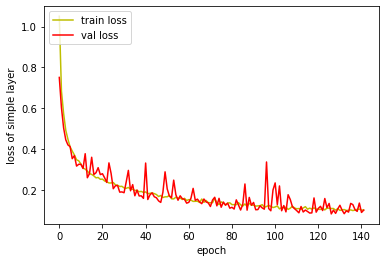

In [37]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss of simple layer')
loss_ax.legend(loc='upper left')

plt.show()

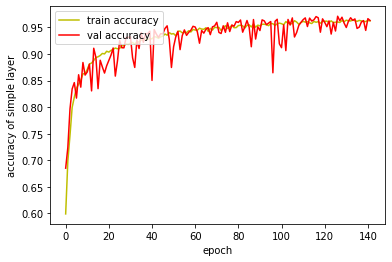

In [38]:
fig, loss_ax = plt.subplots()


loss_ax.plot(hist.history['accuracy'], 'y', label='train accuracy')
loss_ax.plot(hist.history['val_accuracy'], 'r', label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('accuracy of simple layer')
loss_ax.legend(loc='upper left')

plt.show()

In [46]:
#idx 126에서 최적값
print('best performence loss:{}\nbest performenc accuracy:{}'.format(min(hist.history['val_loss']),
                                                                     max(hist.history['val_accuracy'])))

best performence loss:0.0824207216501236
best performenc accuracy:126


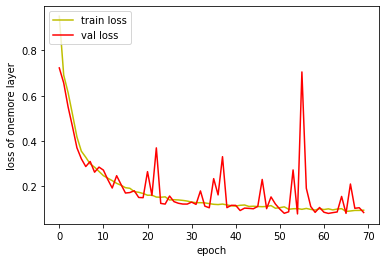

In [47]:
fig, loss_ax = plt.subplots()


loss_ax.plot(hist1.history['loss'], 'y', label='train loss')
loss_ax.plot(hist1.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss of onemore layer')
loss_ax.legend(loc='upper left')

plt.show()

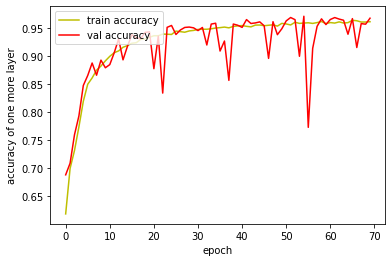

In [39]:
fig, loss_ax = plt.subplots()


loss_ax.plot(hist1.history['accuracy'], 'y', label='train accuracy')
loss_ax.plot(hist1.history['val_accuracy'], 'r', label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('accuracy of one more layer')
loss_ax.legend(loc='upper left')

plt.show()

In [45]:
#idx 54에서 최적값
print('best performence loss:{}\nbest performenc accuracy:{}'.format(min(hist1.history['val_loss']),
                                                                     max(hist1.history['val_accuracy'])))

best performence loss:54
best performenc accuracy:54


#### conclusion : fc layer가 하나 더 있을 때, 성능은 비슷하였으나
#### 수렴속도가 가장 빨랐다. 






.







### 모델을 load 하여 적은 수로 학생의 등급 예측하기
#### load를 위한 layer 구조 재구성
#### timesteps = None으로 두어 가변적 길이의 인풋을 처리할 수 있게함.

In [35]:
model = keras.Sequential()

#timestep = k, k개의 데이터(시간)마다 값이 1개
model.add(layers.Bidirectional(layers.LSTM(6),input_shape = (None,attribute)))
'''model.add(layers.Dense(40,activation = 'relu'))
model.add(layers.Dense(80,activation = 'relu'))
model.add(layers.Dense(160,activation = 'relu'))
model.add(layers.Dense(80,activation = 'relu'))
model.add(layers.Dense(40,activation = 'relu'))'''
model.add(layers.Dense(20,activation = 'relu'))
model.add(layers.Dense(num_of_class,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 12)                624       
_________________________________________________________________
dense (Dense)                (None, 20)                260       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 126       
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________


### 모델 로드

In [112]:
K.clear_session()

In [102]:
model = keras.models.load_model('dataset/model_onemore_layers_fc20.h5')

In [104]:
val = model.predict(np.array([[[4.0,2.0,2.0,0.0,0.029,1]]]))
val

array([[1.5788928e-06, 9.5459974e-01, 4.2573091e-02, 2.7810361e-03,
        4.4567092e-05, 2.6994890e-08]], dtype=float32)

In [111]:
val = model.predict(np.array([[[1,1,3,5,0.524,1]]]))
val

array([[2.2557598e-04, 7.1075186e-09, 4.9966263e-07, 1.8926412e-01,
        5.1760595e-02, 7.5874919e-01]], dtype=float32)

In [107]:
np.argmax(val)

1

In [49]:
student = pd.read_csv('dataset/int_student.csv')
student

,student_id,subject_id,test_id,q1_reaction,q2_reaction,q3_reaction,q4_reaction,q5_reaction,q6_reaction,q7_reaction,...,q23_reaction,q24_reaction,q25_reaction,q26_reaction,q27_reaction,q28_reaction,q29_reaction,q30_reaction,score,grade
0,1157,20100,2002,3,5,3,5,2,1,2,...,6,8,10,9,21,75,330,7,12,5
1,4239,20100,2002,1,4,5,5,2,3,4,...,60,12,8,78,54,37,19,19,18,5
2,1504,20100,2002,1,5,4,4,3,1,1,...,45,13,20,16,60,340,304,24,78,3
3,3197,20100,2002,1,5,5,4,3,1,1,...,45,0,0,0,0,0,0,0,48,5
4,5852,20100,2002,1,5,5,4,3,1,1,...,45,13,20,3,60,682,0,0,72,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88218,522,21150,2110,2,3,1,3,3,2,1,...,6,8,20,29,9,5,0,0,65,5
88219,2897,21150,2110,2,3,1,3,3,2,4,...,6,16,20,29,9,7,0,0,65,5
88220,7061,21150,2110,2,3,1,3,3,2,4,...,6,8,20,0,0,0,0,0,68,5
88221,1241,21150,2110,2,3,1,3,3,2,2,...,6,8,20,29,9,13,136,0,73,5


In [56]:
tmp_ary = np.unique(student['student_id'])

sids = []

for sid in tmp_ary:
    gr = np.unique(student.loc[student['student_id']==sid,'grade'])
    if len(gr)==1:
        sids.append(sid)

In [64]:
for sid in tmp_ary:
    for_check = student.loc[student['student_id']==sid,'grade']
    if len(for_check) == 0:
        print('!!!')

In [58]:
len(sids)

4974

In [59]:
len(tmp_ary)

14060

### 문제를 랜덤으로 넣었을 시 정확도가 너무 낮음.
### 분량상 다음 파일에서